In [19]:
from dcs.vacuum import QsSurface
from dcs.toroidalField import derivatePol, derivateTor

In [20]:
import numpy as np 
import matplotlib.pyplot as plt
try:
    import matplotlib
    matplotlib.rcParams['text.usetex'] = True
except:
    pass

In [21]:
qsProblem = QsSurface(m=1, n=0)
qsProblem.unfixIota = False
qsProblem.changeNfp(2)
qsProblem.changeResolution(mpol=2, ntor=2)
qsProblem.unfixAll()
qsProblem.fixDOF("rc", 0, 0)
qsProblem.surf.r.setRe(0, 0, 1)
qsProblem.fixDOF("rc", 1, 0)
qsProblem.surf.r.setRe(1, 0, 0.2)
qsProblem.fixDOF("zs", 1, 0)
qsProblem.surf.z.setIm(1, 0, 0.2)

In [22]:
res = qsProblem.solve(debug=True, order=3)

In [23]:
g_thetatheta, g_thetazeta, g_zetazeta = qsProblem.surf.metric

In [24]:
fFun = g_thetazeta + g_thetatheta*qsProblem.iota
gFun = g_zetazeta + g_thetazeta*qsProblem.iota
deriGfun = derivatePol(gFun)*(qsProblem.n*qsProblem.nfp) + derivateTor(gFun)*qsProblem.m
normalizeFfun = fFun * (1/g_zetazeta.getRe(0,0))
normalizeGfun = deriGfun * (1/gFun.getRe(0,0))

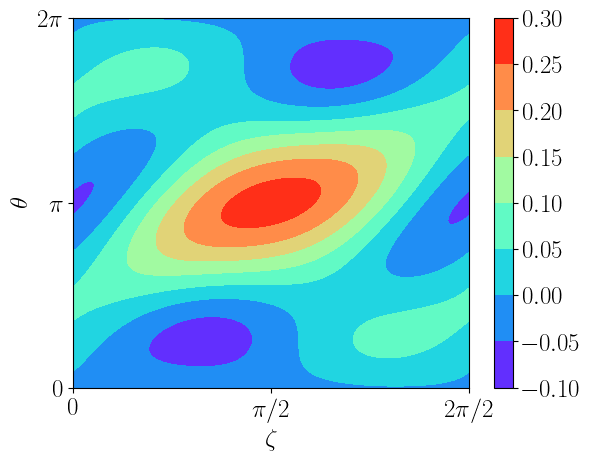

In [25]:
fig, ax = plt.subplots()
normalizeFfun.plot_plt(fig=fig, ax=ax)

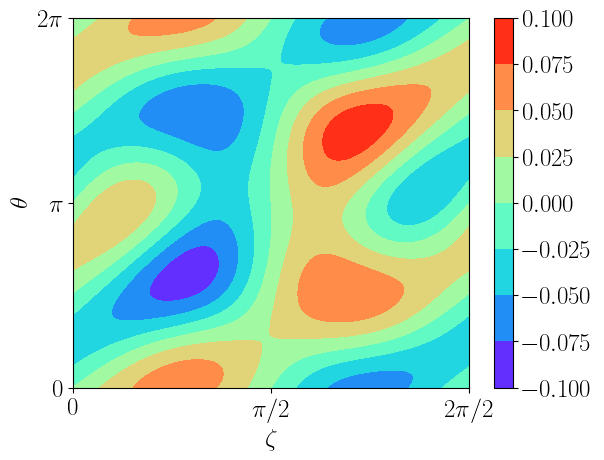

In [26]:
fig, ax = plt.subplots()
normalizeGfun.plot_plt(fig=fig, ax=ax)

In [27]:
print(res.x)
print(qsProblem.iota)

[ 0.         -0.03448817  0.00041708  0.00091734 -0.00715585 -0.07044666
  0.04102009  0.00185747 -0.00022344 -0.00015426  0.01912392 -0.02038852
 -0.00227931  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]
0.618
